# Regressão Softmax com dados do MNIST utilizando gradiente descendente estocástico por minibatches

O objetivo deste notebook é ilustrar 
- o uso do gradiente estocástico por mini-batchs
- utilizando as classes Dataset e DataLoater.

A apresentação da perda nos gráficos é um pouco diferente da usual, mostrando a perda de cada um dos vários minibatches dentro de cada época, de forma que as épocas são apresentadas com valores fracionários.

## Importação das bibliotecas

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.autograd import Variable
from torch.utils.data import DataLoader

import torchvision
from torchvision.datasets import MNIST

## Dataset e dataloader

### Definição do tamanho do minibatch

In [15]:
batch_size = 6000

### Carregamento, criação dataset e do dataloader

In [3]:
! git clone https://github.com/vcasadei/MNIST.git

Cloning into 'MNIST'...
remote: Enumerating objects: 10, done.
remote: Total 10 (delta 0), reused 0 (delta 0), pack-reused 10
Unpacking objects: 100% (10/10), 11.01 MiB | 995.00 KiB/s, done.


In [16]:
dataset_dir = 'MNIST/'

dataset_train = MNIST(dataset_dir, train=True, download=True,
                      transform=torchvision.transforms.ToTensor())

loader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)

print('Número de minibatches de trenamento:', len(loader_train))

x_train, y_train = next(iter(loader_train))
print("\nDimensões dos dados de um minibatch:", x_train.size())
print("Valores mínimo e máximo dos pixels: ", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:         ", type(x_train))
print("Tipo das classes das imagens:       ", type(y_train))

Número de minibatches de trenamento: 10

Dimensões dos dados de um minibatch: torch.Size([6000, 1, 28, 28])
Valores mínimo e máximo dos pixels:  tensor(0.) tensor(1.)
Tipo dos dados das imagens:          <class 'torch.Tensor'>
Tipo das classes das imagens:        <class 'torch.Tensor'>


### Usando apenas 1000 amostras do MNIST

Neste exemplo utilizaremos 1000 amostras de treinamento.

In [17]:
if False:
    n_samples_train = 1000

    dataset_train.train_data = dataset_train.train_data[:n_samples_train]
    dataset_train.train_labels = dataset_train.train_labels[:n_samples_train]

print('Número de minibatches de trenamento:', len(loader_train))
n_batches_train = len(loader_train)
total_samples = dataset_train.train_data.size(0)

Número de minibatches de trenamento: 10


/usr/local/lib/python3.9/dist-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


## Modelo

In [18]:
model = torch.nn.Linear(28*28, 10)


In [19]:
x = torch.ones(28*28).reshape(1, 784)
print(x.shape)
predict = model(x)
predict

torch.Size([1, 784])


tensor([[-0.3964, -1.6375,  0.0541, -0.1905, -1.0866, -0.4580,  0.4707, -0.5407,
          0.4041, -0.2338]], grad_fn=<AddmmBackward0>)

## Treinamento

### Inicialização dos parâmetros

In [20]:
n_epochs = 10
learningRate = 0.5

# Utilizaremos CrossEntropyLoss como função de perda
criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

### Laço de treinamento dos parâmetros

In [21]:
epochs = []
losses = []

total_trained_samples = 0
for i in range(n_epochs):
    for k,(x_train, y_train) in enumerate(loader_train):
        # Transforma a entrada para uma dimensão
        inputs = Variable(x_train.view(-1, 28 * 28))
        # predict da rede
        outputs = model(inputs)

        # calcula a perda
        loss = criterion(outputs, Variable(y_train))

        # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_trained_samples += x_train.size(0)
        epochs.append(total_trained_samples / total_samples)
        losses.append(loss.data)
        
        print(f'Época: {i}/{n_epochs-1} minibatch: {k}/{len(loader_train)}')


Época: 0/9 minibatch: 0/10
Época: 0/9 minibatch: 1/10
Época: 0/9 minibatch: 2/10
Época: 0/9 minibatch: 3/10
Época: 0/9 minibatch: 4/10
Época: 0/9 minibatch: 5/10
Época: 0/9 minibatch: 6/10
Época: 0/9 minibatch: 7/10
Época: 0/9 minibatch: 8/10
Época: 0/9 minibatch: 9/10
Época: 1/9 minibatch: 0/10
Época: 1/9 minibatch: 1/10
Época: 1/9 minibatch: 2/10
Época: 1/9 minibatch: 3/10
Época: 1/9 minibatch: 4/10
Época: 1/9 minibatch: 5/10
Época: 1/9 minibatch: 6/10
Época: 1/9 minibatch: 7/10
Época: 1/9 minibatch: 8/10
Época: 1/9 minibatch: 9/10
Época: 2/9 minibatch: 0/10
Época: 2/9 minibatch: 1/10
Época: 2/9 minibatch: 2/10
Época: 2/9 minibatch: 3/10
Época: 2/9 minibatch: 4/10
Época: 2/9 minibatch: 5/10
Época: 2/9 minibatch: 6/10
Época: 2/9 minibatch: 7/10
Época: 2/9 minibatch: 8/10
Época: 2/9 minibatch: 9/10
Época: 3/9 minibatch: 0/10
Época: 3/9 minibatch: 1/10
Época: 3/9 minibatch: 2/10
Época: 3/9 minibatch: 3/10
Época: 3/9 minibatch: 4/10
Época: 3/9 minibatch: 5/10
Época: 3/9 minibatch: 6/10
É

In [22]:
print('Final loss:', loss.data)

Final loss: tensor(0.3833)


### Visualizando gráfico de perda durante o treinamento

Text(0.5, 0, 'época')

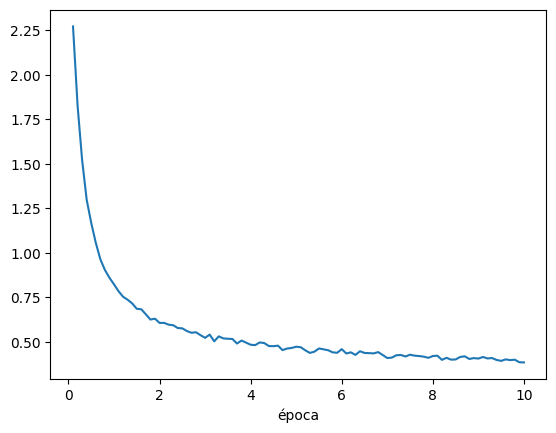

In [23]:
plt.plot(epochs, losses)
plt.xlabel('época')

### Visualização usual da perda, somente no final de cada minibatch

Text(0.5, 0, 'época')

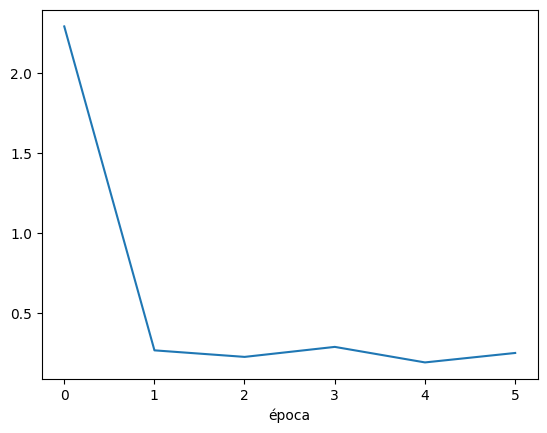

In [12]:
plt.plot(epochs[:5 * n_batches_train +1:n_batches_train], losses[:5 * n_batches_train+1:n_batches_train])
plt.xlabel('época')

Text(0.5, 0, 'época')

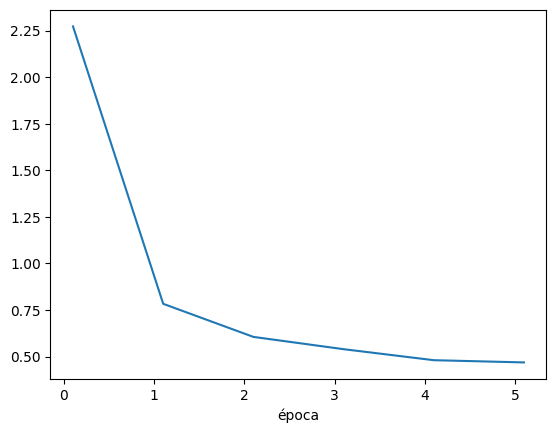

In [24]:
plt.plot(epochs[:5 * n_batches_train +1:n_batches_train], losses[:5 * n_batches_train+1:n_batches_train])
plt.xlabel('época')

# Atividades

## Perguntas

1. Qual é o tamanho do mini-batch?

R.: 100

2. Em uma época, quantos mini-batches existem?

R.: 600

3. Qual é a definição de época?

R.: Iteração sobre os dados (todos os batchs)


## Exercícios


1. Coloque um print no final de cada minibatch, no mesmo estilo do print do final de época, no seguinte estilo:
    - Época: 1/4, batch: 3/10
2. Altere o tamanho de minibatch (batch_size) algumas vezes, refaça o treinamento, e compare no gráfico abaixo a queda da perda para cada tamanho de minibatch.

## Conclusões sobre os experimentos deste notebook
